In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from IPython.display import display, HTML
from natsort import natsorted
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sb

In [27]:
def load_data():
    return pd.read_csv('data.csv')


def print_unique(df):
    for col_name in df:
        col = df[col_name]
        unique_values = col.unique()
        print("{}: {}\n{}\n".format(col_name, len(unique_values), unique_values))


def preprocess(df):
    processed = df.drop(columns=['User_ID', 'Product_ID', 'Stay_In_Current_City_Years'])
    
    cols_with_na = processed.columns[processed.isna().any()]
    processed.fillna(value={k:0 for k in cols_with_na}, inplace=True)
    processed.loc[:, cols_with_na] = processed.loc[:, cols_with_na].astype(int)
    
    purchase_bins = 30
    purchase_col = processed.loc[:, 'Purchase']
    processed.loc[:, 'Purchase'] = pd.cut(purchase_col, bins=purchase_bins, labels=list(range(purchase_bins))).astype(int)
    
    gender_label_mapper = {'M': 1, 'F': 0}
    print(f"Mapping \'Gender' with: {gender_label_mapper}")
    processed.loc[:, 'Gender'] = processed.loc[:, 'Gender'].map(lambda g: gender_label_mapper[g])
    
    cities = natsorted(processed.loc[:, 'City_Category'].unique())
    city_label_mapper = dict(zip(cities, range(len(cities))))
    print(f"Mapping \'City_Category' with: {city_label_mapper}")
    processed.loc[:, 'City_Category'] = processed.loc[:, 'City_Category'].map(lambda city: city_label_mapper[city])
    
    age_ranges = natsorted(processed.loc[:, 'Age'].unique())
    age_label_mapper = dict(zip(age_ranges, range(len(age_ranges))))
    print(f"Mapping \'Age' with: {age_label_mapper}")
    processed.loc[:, 'Age'] = processed.loc[:, 'Age'].map(lambda age: age_label_mapper[age])
    
    return processed


df_original = load_data()
df = preprocess(df_original)
df.head(10)

Mapping 'Gender' with: {'M': 1, 'F': 0}
Mapping 'City_Category' with: {'A': 0, 'B': 1, 'C': 2}
Mapping 'Age' with: {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}


,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,0,3,0,0,10
1,0,0,10,0,0,1,6,14,18
2,0,0,10,0,0,12,0,0,1
3,0,0,10,0,0,12,14,0,1
4,1,6,16,2,0,8,0,0,9
5,1,2,15,0,0,1,2,0,18
6,1,4,7,1,1,1,8,17,24
7,1,4,7,1,1,1,15,0,19
8,1,4,7,1,1,1,16,0,19
9,1,2,20,0,1,8,0,0,9


In [15]:
print_unique(df)
df.info()

Gender: 2
[0 1]

Age: 7
[0 6 2 4 5 3 1]

Occupation: 21
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

City_Category: 3
[0 2 1]

Marital_Status: 2
[0 1]

Product_Category_1: 18
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]

Product_Category_2: 18
[ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]

Product_Category_3: 16
[ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]

Purchase: 29
[10 18  1  9 24 19  6  4  7  2 16 14 12 20  8 13 23 15  5  3  0 11 21 25
 26 17 29 28 22]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 9 columns):
Gender                537577 non-null int64
Age                   537577 non-null int64
Occupation            537577 non-null int64
City_Category         537577 non-null int64
Marital_Status        537577 non-null int64
Product_Category_1    537577 non-null int64
Product_Category_2    537577 non-null int64
Product_Category_3    537577 non-null int64
Purchase              53757

11.248006808426661
10.366279113746907
0         1111
1         1111
2         1111
3         1111
4         2717
5         2316
6         2508
7         2508
8         2508
9         2321
10        2321
11        2321
12        2321
13        2321
14        1610
15        1610
16        1610
17        1610
18        2402
19        2313
20        2313
21        2313
22        2313
23        2313
24        2313
25        2318
26        2318
27        2318
28        2318
29        1402
          ... 
537547    2219
537548    2602
537549    2602
537550    2504
537551    2504
537552    2504
537553    2504
537554    2504
537555    2504
537556    2221
537557    2221
537558    2221
537559    2221
537560    2221
537561    2221
537562    2221
537563    2221
537564    2221
537565    2221
537566    2221
537567    2221
537568    2221
537569    2221
537570    2221
537571    2417
537572    2417
537573    2417
537574    2417
537575    2417
537576    2417
Length: 537577, dtype: int64


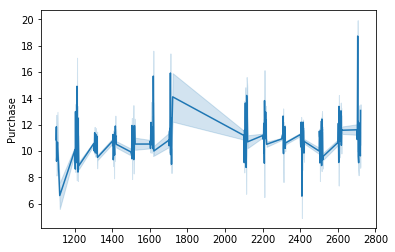

In [39]:
def select(df, where_col, equals, then):
    return df.loc[df[where_col] == equals, then]


# for age_label in list(range(4)):
#     sb.kdeplot(select('Age', age_label, 'Purchase'))
# #     sb.countplot(select('Purchase', age_label, 'Age'))

# a_m_combined = df_original.apply(lambda x:'%s_%s' % (x['Age'],x['Marital_Status']),axis=1)
# sb.countplot(df['Gender'], hue=df['Purchase'])
# sb.countplot(df['Gender'], hue=df['Product_Category_1'])

male_purchases = select(df, 'Gender', 1, 'Purchase')
female_purchases = select(df, 'Gender', 0, 'Purchase')
print(male_purchases.values.mean())
print(female_purchases.values.mean())
# male_purchases = select(df, 'Age', 1, 'Purchase')
# female_purchases = select(df, 'Age', 0, 'Purchase')
# print(male_purchases.values.mean())
# print(female_purchases.values.mean())
# sb.lineplot(x='Gender', y='Purchase', data=df)
# sb.lineplot(x='Age', y='Purchase', data=df)
# sb.lineplot(x='Gender', y='Purchase', hue='Age', data=df)
combined = df.apply(lambda x: (x['Gender']+1)*1000 + (x['Age']+1)*100 + (x['Occupation']+1), axis=1)

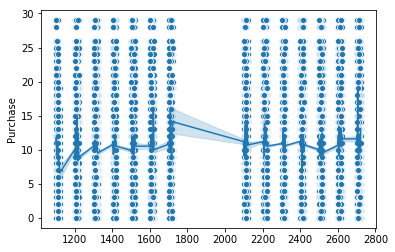

In [40]:
sb.scatterplot(x=combined, y=df['Purchase'])
sb.lineplot(x=combined, y=df['Purchase'])

# Illustration of how apply & map works

```python
result_apply = df.loc[:10, ['User_ID', 'Purchase']].apply(lambda g: g > 10000)
result_map = df.loc[:10, 'Gender'].map(lambda g: g == 'M')

print(result_apply)
print()
print(result_map)
```

```
    User_ID  Purchase
0      True     False
1      True      True
2      True     False
3      True     False
4      True     False
5      True      True
6      True      True
7      True      True
8      True      True
9      True     False
10     True     False

0     False
1     False
2     False
3     False
4      True
5      True
6      True
7      True
8      True
9      True
10     True
Name: Gender, dtype: bool
```

In [4]:
import tensorflow as tf


debug = False

def dense(x, units, act=None):
    xavier_init = tf.contrib.layers.xavier_initializer()
    l2_reg = tf.contrib.layers.l2_regularizer(1e-1)
    return tf.layers.dense(x, units, activation=act,
                           kernel_initializer=xavier_init, bias_initializer=xavier_init,
                           kernel_regularizer=l2_reg, bias_regularizer=l2_reg)


def create_network(input_length, class_count):
    x_input = tf.placeholder(tf.int64, shape=(None, input_length))
    y_input = tf.placeholder(tf.int64, shape=(None))
    
    y_one_hot = tf.one_hot(y_input, class_count)
    
    x, y = tf.cast(x_input, tf.float64), tf.cast(y_one_hot, tf.float64)

    out = dense(x, 1000, act=tf.nn.relu)
    out = dense(x, 500, act=tf.nn.relu)
    out = dense(x, 200, act=tf.nn.relu)
#     out = dense(x, 100, act=tf.nn.relu)
    logits = dense(out, class_count)

    global_step = tf.Variable(0, trainable=False)
    loss = tf.losses.softmax_cross_entropy(y, logits)

    minimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss, global_step=global_step)
    
    y_argmax = tf.argmax(y_one_hot, axis=1)
    logits_argmax = tf.argmax(logits, axis=1)
    test = tf.count_nonzero(tf.equal(y_argmax, logits_argmax))
    
    return x_input, y_input, loss, minimizer, global_step, test


def create_batch(x, y, batch_count):
    mask = np.random.choice(len(x), size=batch_count)
    if debug:
        x_batch = x[mask]
        y_batch = y[mask]
    else:
        x_batch = x.iloc[mask].values
        y_batch = y.iloc[mask].values.squeeze(axis=-1)
    
    return x_batch, y_batch


In [114]:
options = []
if debug:
    xs = np.array([[1]*10 + [0]*10]*10000).reshape(-1, 1)
    ys = np.array([[1]*10 + [0]*10]*10000).reshape(1, -1).squeeze(axis=0)
    input_length = 1
    class_count = 2
    count = len(xs)
    train_count = int(count * 0.9)
    train_x = xs[:train_count]
    train_y = ys[:train_count]
    test_x = xs[train_count+1:]
    test_y = ys[train_count+1:]
    options.append({
        'name': 'debug',
        'input_length': input_length,
        'class_count': class_count,
        'train_x': train_x,
        'train_y': train_y,
        'test_x': test_x,
        'test_y': test_y,
    })
else:
    x_columns_list = [['Gender'], ['Age'], ['Occupation'], ['City_Category'], ['Marital_Status']]
    y_columns = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

    for x_columns in x_columns_list:
        for y_column in y_columns:
            xs = df.loc[:, x_columns]
            ys = df.loc[:, [y_column]]
            input_length = len(x_columns)
            class_count = len(df[y_column].unique())
            count = len(df)
            train_count = int(count * 0.9)
            train_x = xs.iloc[:train_count]
            train_y = ys.iloc[:train_count]
            test_x = xs.iloc[train_count:]
            test_y = ys.iloc[train_count:]
            options.append({
                'x_columns': x_columns,
                'y_column': y_column,
                'name': ' x '.join(x_columns) + '-' + y_column,
                'input_length': input_length,
                'class_count': class_count,
                'train_x': train_x,
                'train_y': train_y,
                'test_x': test_x,
                'test_y': test_y,
            })

In [5]:
def run_option(option):
    name, input_length, class_count, train_x, train_y, test_x, test_y =\
        option['name'], option['input_length'], option['class_count'], option['train_x'], option['train_y'], option['test_x'], option['test_y']
    num_epoch, print_every, learning_rate, train_batch_count, test_batch_count =\
        option['num_epoch'], option['print_every'], option['learning_rate'], option['train_batch_count'], option['test_batch_count']
    
    def run_train(sess, x_batch, y_batch):
        loss_res, _, _ = sess.run([loss, global_step, minimizer], feed_dict={x: x_batch, y: y_batch})
        return loss_res

    def run_test(sess, x_batch, y_batch):
        correct_count = sess.run(test, feed_dict={x: x_batch, y: y_batch})
        accuracy = correct_count / len(x_batch)
        return correct_count, accuracy

    with tf.Session() as sess:
        with tf.variable_scope(name, reuse=tf.AUTO_REUSE):
            x, y, loss, minimizer, global_step, test = create_network(input_length, class_count)
        loss_history = []
        accuracy_history = []

        sess.run(tf.global_variables_initializer())

        for i in range(num_epoch):
            x_batch, y_batch = create_batch(train_x, train_y, train_batch_count)
            loss_res = run_train(sess, x_batch, y_batch)
            _, accuracy = run_test(sess, x_batch, y_batch)

            loss_history.append(loss_res)
            accuracy_history.append(accuracy)

            if i % print_every == 0 or i == num_epoch - 1:
                x_batch, y_batch = create_batch(test_x, test_y, test_batch_count)
                correct_count, accuracy = run_test(sess, x_batch, y_batch)
                print(f"Loss({i:4d}): {loss_res:0.4f}\tAccuracy: {accuracy:0.4f}".format(i, loss_res, accuracy))

        x_batch, y_batch = create_batch(test_x, test_y, test_batch_count)
        correct_count, accuracy = run_test(sess, x_batch, y_batch)
        print(f"Accuracy: {accuracy:0.4f}".format(accuracy))

        x_columns, y_column = option['x_columns'], option['y_column']
        desc = 'x'.join(x_columns) + ' => ' + y_column
        
        fig = plt.figure(figsize=(16, 6)) 
        fig.suptitle(desc, fontsize=16)
        gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

        ax = fig.add_subplot(gs[0])
        ax.plot(loss_history)
        ax.set_title('Loss')
        ax.set_ylabel('Loss')

        ax = fig.add_subplot(gs[1])
        ax.plot(accuracy_history)
        ax.set_title('Accuracy')

        plt.show()

Loss(   0): 3.2720	Accuracy: 0.0000
Loss( 100): 2.7812	Accuracy: 0.1100
Loss( 200): 2.7643	Accuracy: 0.1000
Loss( 300): 2.7070	Accuracy: 0.1000
Loss( 400): 2.6891	Accuracy: 0.0900
Loss( 500): 2.8053	Accuracy: 0.0900
Loss( 600): 2.7021	Accuracy: 0.1200
Loss( 700): 2.7163	Accuracy: 0.1500
Loss( 800): 2.8115	Accuracy: 0.1200
Loss( 900): 2.7611	Accuracy: 0.1400
Loss(1000): 2.8248	Accuracy: 0.1000
Loss(1100): 2.7038	Accuracy: 0.1200
Loss(1200): 2.7205	Accuracy: 0.1600
Loss(1300): 2.7184	Accuracy: 0.1100
Loss(1400): 2.8671	Accuracy: 0.1200
Loss(1500): 2.7672	Accuracy: 0.1300
Loss(1600): 2.8077	Accuracy: 0.1300
Loss(1700): 2.7948	Accuracy: 0.1900
Loss(1800): 2.7526	Accuracy: 0.1200
Loss(1900): 2.7973	Accuracy: 0.1100
Loss(2000): 2.7759	Accuracy: 0.1500
Loss(2100): 2.7149	Accuracy: 0.1200
Loss(2200): 2.7882	Accuracy: 0.1700
Loss(2300): 2.7412	Accuracy: 0.0800
Loss(2400): 2.7736	Accuracy: 0.1100
Loss(2500): 2.7475	Accuracy: 0.1300
Loss(2600): 2.7108	Accuracy: 0.0900
Loss(2700): 2.7334	Accuracy:

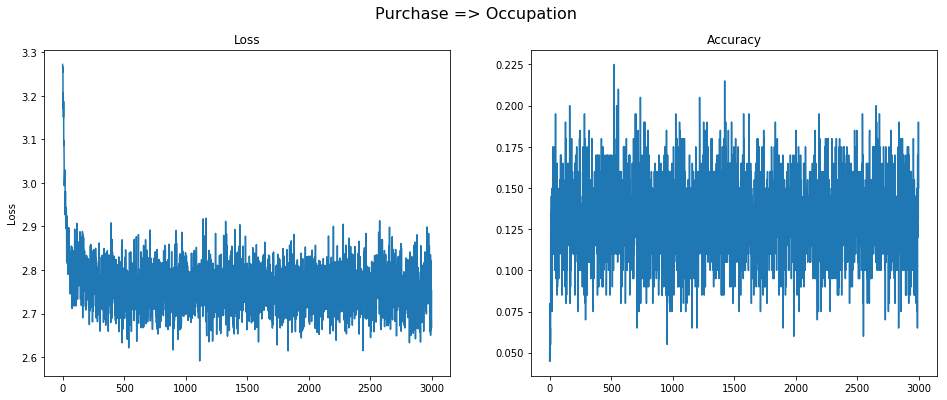

Loss(   0): 0.6906	Accuracy: 0.7200
Loss( 100): 0.5649	Accuracy: 0.7400
Loss( 200): 0.5668	Accuracy: 0.7700
Loss( 300): 0.5292	Accuracy: 0.7700
Loss( 400): 0.5574	Accuracy: 0.7400
Loss( 500): 0.5616	Accuracy: 0.8100
Loss( 600): 0.5438	Accuracy: 0.7300
Loss( 700): 0.5913	Accuracy: 0.7900
Loss( 800): 0.5316	Accuracy: 0.8300
Loss( 900): 0.6023	Accuracy: 0.7700
Loss(1000): 0.5597	Accuracy: 0.7600
Loss(1100): 0.5545	Accuracy: 0.7900
Loss(1200): 0.5165	Accuracy: 0.7700
Loss(1300): 0.5373	Accuracy: 0.7800
Loss(1400): 0.5655	Accuracy: 0.7200
Loss(1500): 0.4949	Accuracy: 0.7600
Loss(1600): 0.5891	Accuracy: 0.7600
Loss(1700): 0.5191	Accuracy: 0.8100
Loss(1800): 0.5187	Accuracy: 0.7600
Loss(1900): 0.5905	Accuracy: 0.7400
Loss(2000): 0.4797	Accuracy: 0.7400
Loss(2100): 0.5199	Accuracy: 0.8100
Loss(2200): 0.5473	Accuracy: 0.7900
Loss(2300): 0.5604	Accuracy: 0.6600
Loss(2400): 0.5776	Accuracy: 0.8000
Loss(2500): 0.5482	Accuracy: 0.8200
Loss(2600): 0.6026	Accuracy: 0.7900
Loss(2700): 0.5643	Accuracy:

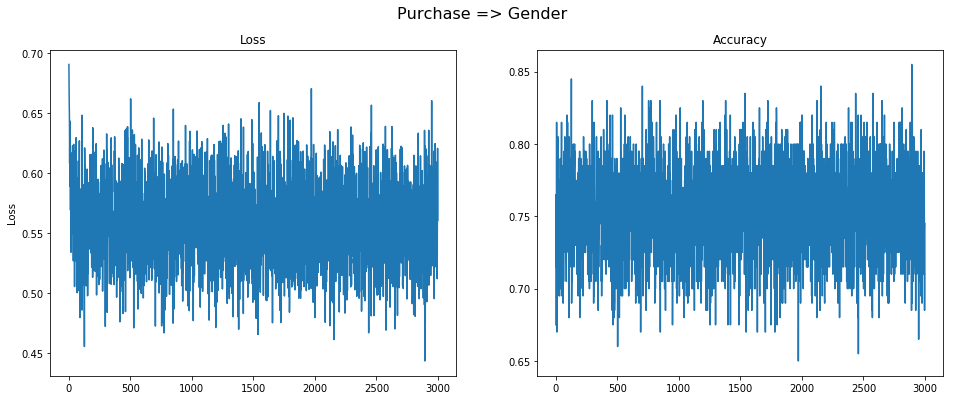

In [9]:
num_epoch = 3000
print_every = 100
learning_rate = 5e-4
train_batch_count = 200
test_batch_count = 100

# x_columns_list = [['Gender'], ['Age']]
# y_columns = ['Product_Category_1']
# x_columns_list = [['Product_Category_1']]
# y_columns = ['Gender']
x_columns_list = [['Purchase']]
y_columns = ['Occupation', 'Gender']

options = []
for x_columns in x_columns_list:
    for y_column in y_columns:
        xs = df.loc[:, x_columns]
        ys = df.loc[:, [y_column]]
        input_length = len(x_columns)
        class_count = len(df[y_column].unique())
        count = len(df)
        train_count = int(count * 0.9)
        train_x = xs.iloc[:train_count]
        train_y = ys.iloc[:train_count]
        test_x = xs.iloc[train_count:]
        test_y = ys.iloc[train_count:]
        options.append({
            'x_columns': x_columns,
            'y_column': y_column,
            'name': ' x '.join(x_columns) + '-' + y_column,
            'input_length': input_length,
            'class_count': class_count,
            'train_x': train_x,
            'train_y': train_y,
            'test_x': test_x,
            'test_y': test_y,
            'num_epoch': num_epoch,
            'print_every': print_every,
            'learning_rate': learning_rate,
            'train_batch_count': train_batch_count,
            'test_batch_count': test_batch_count,
        })

for option in options:
    run_option(option)